In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

In [2]:
#https://archive.ics.uci.edu/ml/datasets/seeds 
data = pd.read_csv('data/seeds_dataset.txt', sep='\s+', header=None)
data.round(3).to_csv('data/seeds_dataset.csv', index=False, header=None)


In [3]:
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
x = data.iloc[:, [0,1,2,3,4,5,6]].values

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

Text(0.5, 1.0, 'K-means clustering')

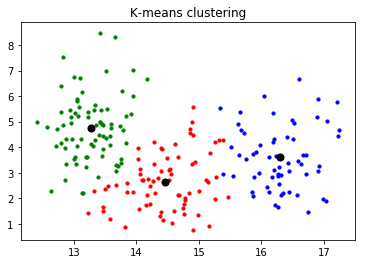

In [5]:
kmeans = KMeans(n_clusters = 3, init='k-means++',max_iter=300,n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 5], s = 10, c = 'red')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 5], s = 10, c = 'blue')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 5], s = 10, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,5], s = 50, c = 'black', label = 'Centroids')
plt.title("K-means clustering")
# plt.legend()

In [6]:


model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',assign_labels='kmeans')

model = model.fit_predict(x)
# fig, ax = plt.subplots(figsize=(9,7))
# ax.set_title('Spectral clustering', fontsize=18, fontweight='demi')
# plt.scatter(x[:, 1], x[:, 5], c=model, s=10)

Text(0.5, 1.0, 'Spectral Clustering')

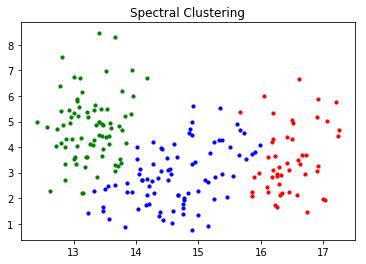

In [7]:
plt.scatter(x[model == 0, 1], x[model == 0, 5], s = 10, c = 'blue')
plt.scatter(x[model == 1, 1], x[model == 1, 5], s = 10, c = 'green')
plt.scatter(x[model == 2, 1], x[model == 2, 5], s = 10, c = 'red')
plt.title("Spectral Clustering")